In [1]:
import sklearn
import pandas as pd
import numpy as np
from __future__ import division
import collections
from sklearn.cross_validation import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn import tree
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Convolution1D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import SGD
from sklearn.cross_validation import cross_val_score
from keras.utils import np_utils
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import sys
from sklearn.ensemble import GradientBoostingRegressor
import math
import csv
import scipy
%matplotlib inline
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report
import urllib

Using TensorFlow backend.


In [2]:
xTrain = np.load('xTrain.npy')
yTrain = np.load('yTrain.npy')

In [3]:
categories=['Wins','PPG','PPGA','PowerConf','3PG','TOP', 'APG', 'Conference Champ', 'Tourney Conference Champ',
            'Seed','SOS','SRS', 'Rebounds', 'Steals', 'Tourney Appearances','National Championships','Location']
df = pd.DataFrame(xTrain, columns=categories)
df['Result'] = pd.Series(yTrain)

In [4]:
df.head()

,Wins,PPG,PPGA,PowerConf,3PG,TOP,APG,Conference Champ,Tourney Conference Champ,Seed,SOS,SRS,Rebounds,Steals,Tourney Appearances,National Championships,Location,Result
0,7.0,15.266129,11.495392,1.0,-0.003456,0.0,6.231567,0.0,0.0,-22.0,13.75,17.34,0.0,4.672811,4.0,0.0,1.0,1.0
1,-12.0,-4.501152,9.720046,-1.0,0.109447,-0.0,-6.464286,0.0,0.0,24.0,-15.49,-29.52,-0.0,2.896313,-12.0,-1.0,1.0,0.0
2,9.0,14.339719,0.476373,1.0,-0.120051,0.0,6.784163,0.0,0.0,-17.0,5.76,18.88,0.0,5.199234,14.0,0.0,1.0,1.0
3,-5.0,-3.200893,1.906250,-1.0,-2.223214,-0.0,-3.303571,0.0,0.0,11.0,-14.70,-20.11,-0.0,0.151786,-5.0,0.0,1.0,0.0
4,1.0,-0.855556,0.596296,0.0,0.718519,0.0,-0.159259,0.0,0.0,0.0,2.37,0.92,0.0,-1.944444,10.0,0.0,-1.0,1.0


In [44]:
allWins = df[df['Result'] == 1]

(array([  2.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   5.00000000e+00,   0.00000000e+00,
          1.30000000e+01,   0.00000000e+00,   2.40000000e+01,
          0.00000000e+00,   2.90000000e+01,   0.00000000e+00,
          5.60000000e+01,   0.00000000e+00,   1.08000000e+02,
          0.00000000e+00,   1.19000000e+02,   0.00000000e+00,
          1.64000000e+02,   0.00000000e+00,   2.65000000e+02,
          0.00000000e+00,   3.88000000e+02,   4.93000000e+02,
          0.00000000e+00,   6.65000000e+02,   0.00000000e+00,
          8.43000000e+02,   0.00000000e+00,   1.06000000e+03,
          0.00000000e+00,   1.23500000e+03,   0.00000000e+00,
          1.52100000e+03,   0.00000000e+00,   1.84500000e+03,
          0.00000000e+00,   2.07300000e+03,   0.00000000e+00,
          2.30000000e+03,   0.00000000e+00,   2.73800000e+03,
          0.00000000e+00,   2.87500000e+03,   0.00000000e+00,
        

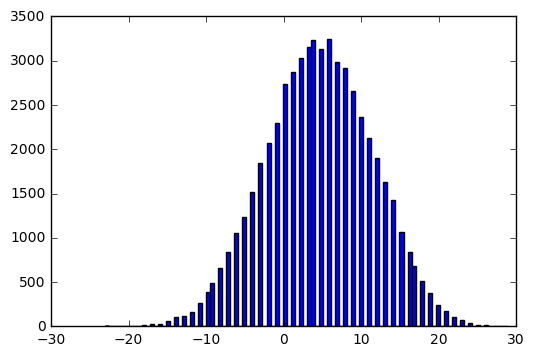

In [45]:
plt.hist(allWins['Wins'], 100)

Basically, on average the winners of basketball games have the following difference between themselves and the opponenet in the below categories. 

In [5]:
for cat in categories:
    print 'The mean of category', cat, ': ',(allWins[cat]).mean()

The mean of category Wins :  4.5340811044
The mean of category PPG :  2.68545764392
The mean of category PPGA :  -2.19561110293
The mean of category PowerConf :  0.0917046715149
The mean of category 3PG :  0.387640043536
The mean of category TOP :  -0.0435052573977
The mean of category APG :  1.09011469794
The mean of category Conference Champ :  0.0176436407177
The mean of category Tourney Conference Champ :  0.0155130214295
The mean of category Seed :  -3.3596168407
The mean of category SOS :  1.40347995281
The mean of category SRS :  5.85602701132
The mean of category Rebounds :  1.6099734698
The mean of category Steals :  0.390964367582
The mean of category Tourney Appearances :  2.53305981582
The mean of category National Championships :  0.0907890334736
The mean of category Location :  0.293409166945


In [6]:
for cat in categories:
    print 'The Pearson correlation between the result and', cat, 'is :',scipy.stats.pearsonr(df[cat], df['Result'])

The Pearson correlation between the result and Wins is : (0.55163803336450568, 0.0)
The Pearson correlation between the result and PPG is : (0.34523822230414264, 0.0)
The Pearson correlation between the result and PPGA is : (-0.3034556123442686, 0.0)
The Pearson correlation between the result and PowerConf is : (0.22539419215811074, 0.0)
The Pearson correlation between the result and 3PG is : (0.14642298473285648, 0.0)
The Pearson correlation between the result and TOP is : (-0.0077929646979420725, 0.0086339768643220165)
The Pearson correlation between the result and APG is : (0.2235190440075864, 0.0)
The Pearson correlation between the result and Conference Champ is : (0.11065630001203593, 3.1981147242103643e-306)
The Pearson correlation between the result and Tourney Conference Champ is : (0.0993667099987873, 4.7524476396603651e-247)
The Pearson correlation between the result and Seed is : (-0.36884650190422463, 0.0)
The Pearson correlation between the result and SOS is : (0.29041688

In [12]:
categories=['PPG','PPGA','PowerConf','3PG','TOP', 'APG', 'Conference Champ', 'Tourney Conference Champ',
            'Seed','SOS','SRS', 'Rebounds', 'Steals', 'Tourney Appearances','National Championships','Location']
np.random.choice(categories,5, replace=False)

array(['Steals', '3PG', 'SOS', 'Seed', 'PPG'], 
      dtype='|S24')

In [33]:
realCategories = ['Wins','PPG','PPGA','PowerConf','3PG', 'APG', 'Conference Champ', 'Tourney Conference Champ',
            'Seed','SOS','SRS', 'Rebounds', 'Steals', 'Tourney Appearances','National Championships','Location']
xTrain = df[categories].as_matrix()
xTrain = xTrain.reshape((113567,4,4,1))
xTrain.shape
X_train, X_test, Y_train, Y_test = train_test_split(xTrain, yTrain)
Y_train = np_utils.to_categorical(Y_train, num_classes)

In [38]:
img_channels = 1
img_rows = 4
img_cols = 4
num_classes = 2
model = Sequential()
model.add(Convolution2D(32, 2, 2, border_mode='same', input_shape=(img_rows, img_cols, img_channels)))
model.add(Activation('relu'))
model.add(Convolution2D(64, 2, 2, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 2, 2, border_mode='same'))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10,shuffle=True)
preds = model.predict_classes( X_test, batch_size=32, verbose=1)
print (np.mean(preds == Y_test))

Epoch 1/10
85175/85175 [==============================] - 21s - loss: 0.5108 - acc: 0.7425    
Epoch 2/10
85175/85175 [==============================] - 19s - loss: 0.5015 - acc: 0.7477    
Epoch 3/10
85175/85175 [==============================] - 19s - loss: 0.4972 - acc: 0.7491    
Epoch 4/10
85175/85175 [==============================] - 19s - loss: 0.4943 - acc: 0.7508    
Epoch 5/10
85175/85175 [==============================] - 21s - loss: 0.4937 - acc: 0.7511    
Epoch 6/10
85175/85175 [==============================] - 19s - loss: 0.4923 - acc: 0.7521    
Epoch 7/10
85175/85175 [==============================] - 20s - loss: 0.4903 - acc: 0.7533    
Epoch 8/10
85175/85175 [==============================] - 20s - loss: 0.4905 - acc: 0.7523    
Epoch 9/10
85175/85175 [==============================] - 19s - loss: 0.4904 - acc: 0.7548    
Epoch 10/10
28392/28392 [==============================] - 2s     
0.759227951536


In [46]:
trainDict={}
xTrain = df.as_matrix()
for i in range(17):   
    for p in range(10):
        modifiedCategories = np.random.choice(categories,i, replace=False)
        modifiedCategories = np.append(modifiedCategories, 'Wins')
        modCatList = modifiedCategories.tolist()
        str1 = ''.join(modCatList)
        modifiedxTrain = df[modifiedCategories].as_matrix()
        #model = tree.DecisionTreeClassifier()
        #model = tree.DecisionTreeRegressor()
        #model = linear_model.LogisticRegression()
        #model = linear_model.BayesianRidge()
        #model = linear_model.Lasso()
        #model = svm.SVC()
        #model = svm.SVR()
        #model = linear_model.Ridge(alpha = 0.5)
        #model = AdaBoostClassifier(n_estimators=100)
        #model1 = GradientBoostingClassifier(n_estimators=100)
        model = GradientBoostingRegressor(n_estimators=100)
        #model = RandomForestClassifier(n_estimators=200)
        #model = KNeighborsClassifier(n_neighbors=101)
        accuracy=[]
        for q in range(10):
            X_train, X_test, Y_train, Y_test = train_test_split(modifiedxTrain, yTrain)
            #X_train, X_test, Y_train, Y_test = train_test_split(xTrain, yTrain)
            model.fit(X_train, Y_train)
            results = model.fit(X_train, Y_train)
            preds = model.predict(X_test)
            preds[preds < .5] = 0
            preds[preds >= .5] = 1
            accuracy.append(np.mean(preds == Y_test))
        trainDict[str1] = sum(accuracy)/len(accuracy)
        print 'Iteration',(i*10 + p),'Done'
for key, value in sorted(trainDict.iteritems(), key=lambda (k,v): (v,k), reverse=True):
    print "%s: %s" % (key, value)

Iteration 0 Done
Iteration 1 Done
Iteration 2 Done
Iteration 3 Done
Iteration 4 Done
Iteration 5 Done
Iteration 6 Done
Iteration 7 Done
Iteration 8 Done
Iteration 9 Done
Iteration 10 Done
Iteration 11 Done
Iteration 12 Done
Iteration 13 Done
Iteration 14 Done
Iteration 15 Done
Iteration 16 Done
Iteration 17 Done
Iteration 18 Done
Iteration 19 Done
Iteration 20 Done
Iteration 21 Done
Iteration 22 Done
Iteration 23 Done
Iteration 24 Done
Iteration 25 Done
Iteration 26 Done
Iteration 27 Done
Iteration 28 Done
Iteration 29 Done
Iteration 30 Done
Iteration 31 Done
Iteration 32 Done
Iteration 33 Done
Iteration 34 Done
Iteration 35 Done
Iteration 36 Done
Iteration 37 Done
Iteration 38 Done
Iteration 39 Done
Iteration 40 Done
Iteration 41 Done
Iteration 42 Done
Iteration 43 Done
Iteration 44 Done
Iteration 45 Done
Iteration 46 Done
Iteration 47 Done
Iteration 48 Done
Iteration 49 Done
Iteration 50 Done
Iteration 51 Done
Iteration 52 Done
Iteration 53 Done
Iteration 54 Done
Iteration 55 Done
It